<a href="https://colab.research.google.com/github/Sihamharimech1/Weather-collab/blob/main/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Standard libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import os
import requests

# TensorFlow LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# For scaling features
from sklearn.preprocessing import MinMaxScaler

# Create folders
os.makedirs("datasets", exist_ok=True)
os.makedirs("models", exist_ok=True)


In [3]:
cities = {
    "Casablanca": (33.5731, -7.5898),
    "Rabat": (34.0209, -6.8416),
    "Fes": (34.0331, -5.0003),
    "Marrakech": (31.6295, -7.9811),
    "Tangier": (35.7595, -5.8340),
    "Agadir": (30.4278, -9.5981),
    "Oujda": (34.6814, -1.9086),
    "Kenitra": (34.2610, -6.5802),
    "Tetouan": (35.5889, -5.3626),
    "Safi": (32.2994, -9.2372),
    "El_Jadida": (33.2549, -8.5060),
    "Beni_Mellal": (32.3373, -6.3498),
    "Khouribga": (32.8811, -6.9063),
    "Nador": (35.1681, -2.9335),
    "Laayoune": (27.1536, -13.2033),
    "Dakhla": (23.6848, -15.9570)
}


In [4]:
from datetime import datetime, timedelta
import pandas as pd
import os
import requests

# Ensure folder exists
os.makedirs("datasets", exist_ok=True)

# Dates
start_date = datetime(2024, 1, 1)
end_date = datetime.today() - timedelta(days=1)  # yesterday

def fetch_open_meteo(city, lat, lon, start, end):
    url = f"https://archive-api.open-meteo.com/v1/archive?" \
          f"latitude={lat}&longitude={lon}" \
          f"&start_date={start.date()}&end_date={end.date()}" \
          f"&daily=temperature_2m_max,temperature_2m_min,temperature_2m_mean," \
          f"precipitation_sum,relative_humidity_2m_mean&timezone=GMT"

    r = requests.get(url)
    print(f"Status code for {city}: {r.status_code}")
    print("Raw response snippet:", r.text[:500])  # first 500 chars

    try:
        data = r.json()
    except Exception as e:
        print(f"JSON decode error for {city}: {e}")
        return None

    if "daily" not in data:
        print(f"No daily data for {city} — response:\n", data)
        return None

    df = pd.DataFrame({
        "date": data["daily"]["time"],
        "tmax": data["daily"]["temperature_2m_max"],
        "tmin": data["daily"]["temperature_2m_min"],
        "tavg": data["daily"]["temperature_2m_mean"],
        "prcp": data["daily"]["precipitation_sum"],
        "rhum": data["daily"]["relative_humidity_2m_mean"]
    })

    df = df.interpolate().dropna()
    df.to_csv(f"datasets/{city.lower()}.csv", index=False)
    print(f"Saved dataset for {city} ({len(df)} rows)")
    return df

# Loop through all cities
for city, (lat, lon) in cities.items():
    fetch_open_meteo(city, lat, lon, start_date, end_date)


Status code for Casablanca: 200
Raw response snippet: {"latitude":33.56766,"longitude":-7.5836487,"generationtime_ms":53.604960441589355,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":44.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05","2024-01-06","2024-01-07","2024-01-08","2024-01-09","2024-01-10","2024-01-11","
Saved dataset for Casablanca (747 rows)


/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()


Status code for Rabat: 200
Raw response snippet: {"latitude":33.989452,"longitude":-6.8539124,"generationtime_ms":165.02726078033447,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":18.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05","2024-01-06","2024-01-07","2024-01-08","2024-01-09","2024-01-10","2024-01-11",
Saved dataset for Rabat (747 rows)
Status code for Fes: 200
Raw response snippet: {"latitude":34.059753,"longitude":-4.950012,"generationtime_ms":36.55135631561279,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":405.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-01"

/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()
/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()


Status code for Marrakech: 200
Raw response snippet: {"latitude":31.599297,"longitude":-7.976074,"generationtime_ms":77.01253890991211,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":469.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05","2024-01-06","2024-01-07","2024-01-08","2024-01-09","2024-01-10","2024-01-11","
Saved dataset for Marrakech (747 rows)
Status code for Tangier: 200
Raw response snippet: {"latitude":35.74692,"longitude":-5.7989807,"generationtime_ms":34.54148769378662,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":48.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["

/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()
/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()


Status code for Agadir: 200
Raw response snippet: {"latitude":30.474516,"longitude":-9.623993,"generationtime_ms":116.39559268951416,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":62.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05","2024-01-06","2024-01-07","2024-01-08","2024-01-09","2024-01-10","2024-01-11","
Saved dataset for Agadir (747 rows)
Status code for Oujda: 200
Raw response snippet: {"latitude":34.69244,"longitude":-1.9342651,"generationtime_ms":103.84631156921387,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":552.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-0

/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()
/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()


Saved dataset for Oujda (747 rows)
Status code for Kenitra: 200
Raw response snippet: {"latitude":34.27065,"longitude":-6.5495605,"generationtime_ms":57.35623836517334,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":11.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05","2024-01-06","2024-01-07","2024-01-08","2024-01-09","2024-01-10","2024-01-11","2
Saved dataset for Kenitra (747 rows)


/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()
/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()


Status code for Tetouan: 200
Raw response snippet: {"latitude":35.606327,"longitude":-5.32135,"generationtime_ms":60.8060359954834,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":141.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05","2024-01-06","2024-01-07","2024-01-08","2024-01-09","2024-01-10","2024-01-11","20
Saved dataset for Tetouan (747 rows)
Status code for Safi: 200
Raw response snippet: {"latitude":32.37258,"longitude":-9.283997,"generationtime_ms":75.21617412567139,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":35.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-

/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()
/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()


Status code for El_Jadida: 200
Raw response snippet: {"latitude":33.216167,"longitude":-8.534485,"generationtime_ms":73.5616683959961,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":10.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05","2024-01-06","2024-01-07","2024-01-08","2024-01-09","2024-01-10","2024-01-11","20
Saved dataset for El_Jadida (747 rows)
Status code for Beni_Mellal: 200
Raw response snippet: {"latitude":32.37258,"longitude":-6.334961,"generationtime_ms":4.172086715698242,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":533.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time

/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()
/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()


Status code for Khouribga: 200
Raw response snippet: {"latitude":32.864674,"longitude":-6.9400024,"generationtime_ms":67.76595115661621,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":802.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05","2024-01-06","2024-01-07","2024-01-08","2024-01-09","2024-01-10","2024-01-11",
Saved dataset for Khouribga (747 rows)
Status code for Nador: 200
Raw response snippet: {"latitude":35.184532,"longitude":-2.9847107,"generationtime_ms":82.49378204345703,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":24.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2

/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()
/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()


Status code for Laayoune: 200
Raw response snippet: {"latitude":27.170473,"longitude":-13.229401,"generationtime_ms":70.81902027130127,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":69.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05","2024-01-06","2024-01-07","2024-01-08","2024-01-09","2024-01-10","2024-01-11","
Saved dataset for Laayoune (747 rows)
Status code for Dakhla: 200
Raw response snippet: {"latitude":23.585236,"longitude":-15.837738,"generationtime_ms":771.6164588928223,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":8.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm","relative_humidity_2m_mean":"%"},"daily":{"time":["202

/tmp/ipython-input-1421292036.py:43: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate().dropna()


In [8]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Reshape, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import joblib

# ======================
# Parameters
# ======================
FEATURES = ["tavg", "tmin", "tmax", "prcp", "rhum"]
PAST_DAYS = 30
FUTURE_DAYS = 15
DATA_DIR = "datasets"
MODEL_DIR = "models"
SCALER_DIR = "scalers"

os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(SCALER_DIR, exist_ok=True)

# ======================
# Helper functions
# ======================
def create_sequences(data, past_days, future_days):
    X, y = [], []
    for i in range(len(data) - past_days - future_days + 1):
        X.append(data[i:i + past_days])
        y.append(data[i + past_days:i + past_days + future_days])
    return np.array(X), np.array(y)

def inverse_scale(scaled_data, scaler):
    reshaped = scaled_data.reshape(-1, scaled_data.shape[-1])
    inversed = scaler.inverse_transform(reshaped)
    return inversed.reshape(scaled_data.shape)

# ======================
# Training loop
# ======================
for file in os.listdir(DATA_DIR):
    if not file.endswith(".csv"):
        continue

    city = file.replace(".csv", "").lower()
    print(f"\n============================")
    print(f"Training model for {city}")
    print(f"============================")

    # Load & sort
    df = pd.read_csv(os.path.join(DATA_DIR, file), parse_dates=["date"])
    df = df.sort_values("date").reset_index(drop=True)
    values = df[FEATURES].values

    # Scale
    scaler = MinMaxScaler()
    scaled_values = scaler.fit_transform(values)
    joblib.dump(scaler, os.path.join(SCALER_DIR, f"{city}_scaler.save"))

    # Sequences
    X, y = create_sequences(scaled_values, PAST_DAYS, FUTURE_DAYS)

    # Time-series split
    split_idx = int(0.8 * len(X))
    X_train, X_val = X[:split_idx], X[split_idx:]
    y_train, y_val = y[:split_idx], y[split_idx:]

    # ======================
    # 2-layer LSTM model
    # ======================
    model = Sequential([
        LSTM(
            64,
            return_sequences=True,
            input_shape=(PAST_DAYS, len(FEATURES))
        ),
        Dropout(0.2),
        LSTM(32),
        Dropout(0.2),
        Dense(FUTURE_DAYS * len(FEATURES)),
        Reshape((FUTURE_DAYS, len(FEATURES)))
    ])

    model.compile(
        optimizer="adam",
        loss="mse",
        metrics=["mae"]
    )

    early_stop = EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    )

    # ======================
    # Train
    # ======================
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        epochs=50,
        batch_size=32,
        callbacks=[early_stop],
        verbose=1
    )

    # ======================
    # Evaluation (scaled)
    # ======================
    val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)
    val_rmse = np.sqrt(val_loss)

    print("\n📊 Scaled Evaluation Metrics")
    print(f"MAE : {val_mae:.4f}")
    print(f"RMSE: {val_rmse:.4f}")

    # ======================
    # Evaluation (real-world)
    # ======================
    y_val_pred = model.predict(X_val, verbose=0)

    y_val_real = inverse_scale(y_val, scaler)
    y_pred_real = inverse_scale(y_val_pred, scaler)

    print("\n📊 Real-World Metrics (per feature)")
    for i, feature in enumerate(FEATURES):
        mae = np.mean(np.abs(y_pred_real[:, :, i] - y_val_real[:, :, i]))
        rmse = np.sqrt(np.mean((y_pred_real[:, :, i] - y_val_real[:, :, i]) ** 2))
        print(f"{feature.upper():5s} → MAE: {mae:.3f} | RMSE: {rmse:.3f}")

    # ======================
    # Save model
    # ======================
    model.save(os.path.join(MODEL_DIR, f"{city}.keras"))
    print(f"\n✅ Model & scaler saved for {city}")



Training model for rabat
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.2107 - mae: 0.3795 - val_loss: 0.0924 - val_mae: 0.2345
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0933 - mae: 0.2386 - val_loss: 0.0381 - val_mae: 0.1489
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0513 - mae: 0.1766 - val_loss: 0.0234 - val_mae: 0.1108
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0373 - mae: 0.1488 - val_loss: 0.0200 - val_mae: 0.1010
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0316 - mae: 0.1376 - val_loss: 0.0183 - val_mae: 0.0969
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0286 - mae: 0.1296 - val_loss: 0.0176 - val_mae: 0.0946
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0278 - mae: 0.1269 - val_loss: 0.0163 - val_mae: 0.0919
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0260 - mae: 0.1222 - val_loss: 0.0157 - val_mae: 0.0911
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0237 - mae: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.2272 - mae: 0.3917 - val_loss: 0.1054 - val_mae: 0.2453
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1120 - mae: 0.2554 - val_loss: 0.0539 - val_mae: 0.1701
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0659 - mae: 0.1955 - val_loss: 0.0363 - val_mae: 0.1398
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0488 - mae: 0.1697 - val_loss: 0.0279 - val_mae: 0.1267
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0414 - mae: 0.1566 - val_loss: 0.0235 - val_mae: 0.1173
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0357 - mae: 0.1467 - val_loss: 0.0227 - val_mae: 0.1169
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0316 - mae: 0.1366 - val_loss: 0.0211 - val_mae: 0.1098
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0294 - mae: 0.1319 - val_loss: 0.0209 - val_mae: 0.1125
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0278 - mae: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.1950 - mae: 0.3608 - val_loss: 0.0858 - val_mae: 0.2210
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0905 - mae: 0.2317 - val_loss: 0.0468 - val_mae: 0.1551
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0574 - mae: 0.1827 - val_loss: 0.0381 - val_mae: 0.1394
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0455 - mae: 0.1633 - val_loss: 0.0351 - val_mae: 0.1370
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0404 - mae: 0.1540 - val_loss: 0.0319 - val_mae: 0.1302
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0384 - mae: 0.1499 - val_loss: 0.0290 - val_mae: 0.1249
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0355 - mae: 0.1437 - val_loss: 0.0271 - val_mae: 0.1221
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0335 - mae: 0.1401 - val_loss: 0.0283 - val_mae: 0.1252
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0313 - mae: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.2406 - mae: 0.4127 - val_loss: 0.1214 - val_mae: 0.2666
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1148 - mae: 0.2609 - val_loss: 0.0445 - val_mae: 0.1595
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0582 - mae: 0.1876 - val_loss: 0.0236 - val_mae: 0.1150
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0386 - mae: 0.1523 - val_loss: 0.0192 - val_mae: 0.0952
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0320 - mae: 0.1378 - val_loss: 0.0185 - val_mae: 0.0965
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0292 - mae: 0.1303 - val_loss: 0.0169 - val_mae: 0.0896
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0260 - mae: 0.1229 - val_loss: 0.0164 - val_mae: 0.0881
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0251 - mae: 0.1205 - val_loss: 0.0161 - val_mae: 0.0880
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0240 - mae: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.1881 - mae: 0.3560 - val_loss: 0.0870 - val_mae: 0.2294
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0845 - mae: 0.2253 - val_loss: 0.0450 - val_mae: 0.1514
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0478 - mae: 0.1669 - val_loss: 0.0373 - val_mae: 0.1328
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0385 - mae: 0.1485 - val_loss: 0.0341 - val_mae: 0.1248
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0342 - mae: 0.1402 - val_loss: 0.0330 - val_mae: 0.1262
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0320 - mae: 0.1361 - val_loss: 0.0305 - val_mae: 0.1226
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0294 - mae: 0.1307 - val_loss: 0.0294 - val_mae: 0.1225
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0276 - mae: 0.1264 - val_loss: 0.0269 - val_mae: 0.1145
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0259 - mae: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.2157 - mae: 0.3881 - val_loss: 0.1058 - val_mae: 0.2523
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1117 - mae: 0.2579 - val_loss: 0.0438 - val_mae: 0.1519
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0559 - mae: 0.1814 - val_loss: 0.0333 - val_mae: 0.1343
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0438 - mae: 0.1623 - val_loss: 0.0286 - val_mae: 0.1182
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0403 - mae: 0.1541 - val_loss: 0.0289 - val_mae: 0.1231
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0364 - mae: 0.1473 - val_loss: 0.0264 - val_mae: 0.1151
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0334 - mae: 0.1404 - val_loss: 0.0248 - val_mae: 0.1112
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0305 - mae: 0.1339 - val_loss: 0.0240 - val_mae: 0.1104
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0302 - mae: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.2007 - mae: 0.3683 - val_loss: 0.0902 - val_mae: 0.2270
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0887 - mae: 0.2299 - val_loss: 0.0347 - val_mae: 0.1384
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0463 - mae: 0.1661 - val_loss: 0.0224 - val_mae: 0.1052
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0368 - mae: 0.1471 - val_loss: 0.0202 - val_mae: 0.0999
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0309 - mae: 0.1352 - val_loss: 0.0200 - val_mae: 0.1013
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0284 - mae: 0.1291 - val_loss: 0.0193 - val_mae: 0.0997
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0255 - mae: 0.1216 - val_loss: 0.0177 - val_mae: 0.0937
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0247 - mae: 0.1195 - val_loss: 0.0167 - val_mae: 0.0915
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0226 - mae: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.1930 - mae: 0.3546 - val_loss: 0.1036 - val_mae: 0.2392
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0892 - mae: 0.2273 - val_loss: 0.0419 - val_mae: 0.1460
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0498 - mae: 0.1705 - val_loss: 0.0288 - val_mae: 0.1183
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0382 - mae: 0.1481 - val_loss: 0.0244 - val_mae: 0.1069
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0336 - mae: 0.1377 - val_loss: 0.0240 - val_mae: 0.1043
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0298 - mae: 0.1278 - val_loss: 0.0234 - val_mae: 0.1035
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0282 - mae: 0.1261 - val_loss: 0.0231 - val_mae: 0.1022
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0267 - mae: 0.1206 - val_loss: 0.0229 - val_mae: 0.1029
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0257 - mae: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.2156 - mae: 0.3831 - val_loss: 0.1068 - val_mae: 0.2614
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1080 - mae: 0.2573 - val_loss: 0.0448 - val_mae: 0.1550
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0562 - mae: 0.1808 - val_loss: 0.0334 - val_mae: 0.1265
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0430 - mae: 0.1578 - val_loss: 0.0333 - val_mae: 0.1280
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0378 - mae: 0.1485 - val_loss: 0.0333 - val_mae: 0.1321
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0351 - mae: 0.1432 - val_loss: 0.0324 - val_mae: 0.1319
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0327 - mae: 0.1385 - val_loss: 0.0282 - val_mae: 0.1186
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0312 - mae: 0.1356 - val_loss: 0.0263 - val_mae: 0.1142
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0294 - mae: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.2223 - mae: 0.3885 - val_loss: 0.1151 - val_mae: 0.2673
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1134 - mae: 0.2627 - val_loss: 0.0432 - val_mae: 0.1551
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0568 - mae: 0.1828 - val_loss: 0.0253 - val_mae: 0.1158
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0406 - mae: 0.1553 - val_loss: 0.0214 - val_mae: 0.1057
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0343 - mae: 0.1419 - val_loss: 0.0189 - val_mae: 0.1005
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0310 - mae: 0.1342 - val_loss: 0.0211 - val_mae: 0.1107
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0290 - mae: 0.1296 - val_loss: 0.0178 - val_mae: 0.0999
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0268 - mae: 0.1246 - val_loss: 0.0196 - val_mae: 0.1064
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0241 - mae: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.1938 - mae: 0.3630 - val_loss: 0.0779 - val_mae: 0.2183
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0842 - mae: 0.2271 - val_loss: 0.0277 - val_mae: 0.1232
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0447 - mae: 0.1646 - val_loss: 0.0177 - val_mae: 0.0966
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0339 - mae: 0.1407 - val_loss: 0.0162 - val_mae: 0.0899
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0305 - mae: 0.1333 - val_loss: 0.0160 - val_mae: 0.0892
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0272 - mae: 0.1249 - val_loss: 0.0156 - val_mae: 0.0877
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0250 - mae: 0.1198 - val_loss: 0.0153 - val_mae: 0.0866
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0227 - mae: 0.1142 - val_loss: 0.0166 - val_mae: 0.0922
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0234 - mae: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.2523 - mae: 0.4214 - val_loss: 0.1406 - val_mae: 0.2887
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1380 - mae: 0.2889 - val_loss: 0.0581 - val_mae: 0.1783
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0677 - mae: 0.1983 - val_loss: 0.0320 - val_mae: 0.1307
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0453 - mae: 0.1632 - val_loss: 0.0275 - val_mae: 0.1215
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0389 - mae: 0.1509 - val_loss: 0.0251 - val_mae: 0.1145
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0348 - mae: 0.1421 - val_loss: 0.0247 - val_mae: 0.1147
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0322 - mae: 0.1358 - val_loss: 0.0227 - val_mae: 0.1101
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0293 - mae: 0.1292 - val_loss: 0.0236 - val_mae: 0.1136
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0277 - mae: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.2279 - mae: 0.3875 - val_loss: 0.1206 - val_mae: 0.2644
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1161 - mae: 0.2646 - val_loss: 0.0400 - val_mae: 0.1514
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0572 - mae: 0.1850 - val_loss: 0.0230 - val_mae: 0.1122
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0394 - mae: 0.1527 - val_loss: 0.0196 - val_mae: 0.1013
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0351 - mae: 0.1432 - val_loss: 0.0183 - val_mae: 0.0983
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0308 - mae: 0.1333 - val_loss: 0.0168 - val_mae: 0.0938
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0291 - mae: 0.1299 - val_loss: 0.0159 - val_mae: 0.0917
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0270 - mae: 0.1239 - val_loss: 0.0152 - val_mae: 0.0904
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0250 - mae: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.2036 - mae: 0.3720 - val_loss: 0.1137 - val_mae: 0.2613
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1059 - mae: 0.2487 - val_loss: 0.0533 - val_mae: 0.1619
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0593 - mae: 0.1818 - val_loss: 0.0357 - val_mae: 0.1365
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0432 - mae: 0.1570 - val_loss: 0.0303 - val_mae: 0.1270
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0356 - mae: 0.1427 - val_loss: 0.0261 - val_mae: 0.1179
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0332 - mae: 0.1381 - val_loss: 0.0261 - val_mae: 0.1212
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0291 - mae: 0.1290 - val_loss: 0.0228 - val_mae: 0.1121
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0262 - mae: 0.1222 - val_loss: 0.0201 - val_mae: 0.1032
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0248 - mae: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.1873 - mae: 0.3542 - val_loss: 0.0879 - val_mae: 0.2298
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0803 - mae: 0.2212 - val_loss: 0.0351 - val_mae: 0.1374
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0419 - mae: 0.1577 - val_loss: 0.0243 - val_mae: 0.1080
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0319 - mae: 0.1354 - val_loss: 0.0214 - val_mae: 0.1004
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0302 - mae: 0.1311 - val_loss: 0.0211 - val_mae: 0.0990
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0266 - mae: 0.1223 - val_loss: 0.0213 - val_mae: 0.0994
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0240 - mae: 0.1155 - val_loss: 0.0205 - val_mae: 0.0963
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0233 - mae: 0.1121 - val_loss: 0.0208 - val_mae: 0.0956
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0218 - mae: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.1575 - mae: 0.3193 - val_loss: 0.0766 - val_mae: 0.2080
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0719 - mae: 0.2051 - val_loss: 0.0349 - val_mae: 0.1360
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0418 - mae: 0.1561 - val_loss: 0.0247 - val_mae: 0.1114
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0319 - mae: 0.1354 - val_loss: 0.0226 - val_mae: 0.1037
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0290 - mae: 0.1280 - val_loss: 0.0224 - val_mae: 0.1021
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0271 - mae: 0.1222 - val_loss: 0.0221 - val_mae: 0.1009
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0262 - mae: 0.1201 - val_loss: 0.0219 - val_mae: 0.0992
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0251 - mae: 0.1167 - val_loss: 0.0218 - val_mae: 0.0984
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0242 - mae: 0.

In [9]:
import joblib
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Ensure scaler folder exists
os.makedirs("scalers", exist_ok=True)

features = ["tavg", "tmin", "tmax", "prcp", "rhum"]

for city_file in os.listdir("datasets"):
    if not city_file.endswith(".csv"):
        continue
    city = city_file.replace(".csv", "")

    # Load CSV
    df = pd.read_csv(f"datasets/{city_file}")
    df['date'] = pd.to_datetime(df['date'])
    df[features] = df[features].astype(float)
    df = df.interpolate().dropna()

    # Fit scaler
    scaler = MinMaxScaler()
    scaler.fit(df[features])

    # Save scaler
    joblib.dump(scaler, f"scalers/{city}_scaler.save")
    print(f"Saved scaler for {city}")


Saved scaler for rabat
Saved scaler for fes
Saved scaler for khouribga
Saved scaler for el_jadida
Saved scaler for marrakech
Saved scaler for oujda
Saved scaler for casablanca
Saved scaler for dakhla
Saved scaler for beni_mellal
Saved scaler for tangier
Saved scaler for safi
Saved scaler for tetouan
Saved scaler for kenitra
Saved scaler for nador
Saved scaler for laayoune
Saved scaler for agadir


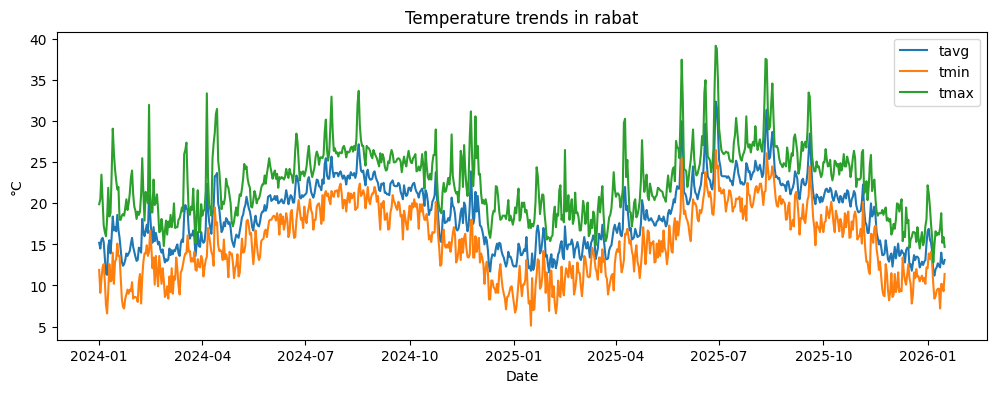

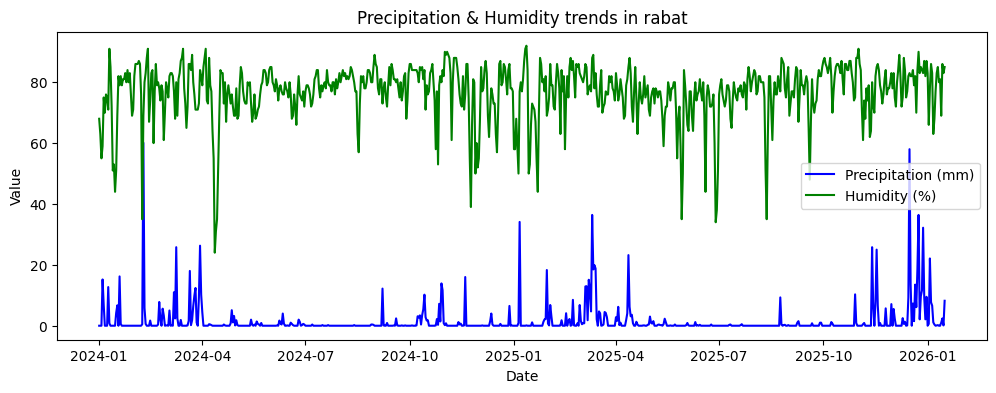

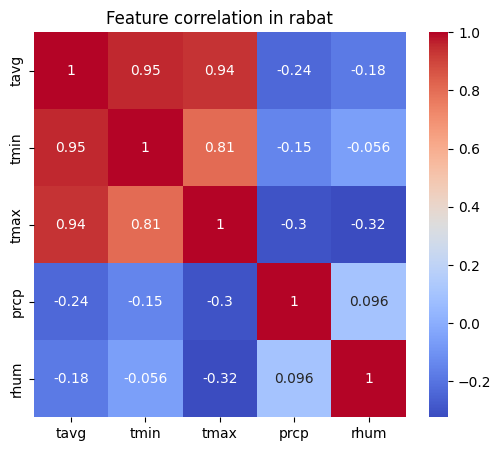

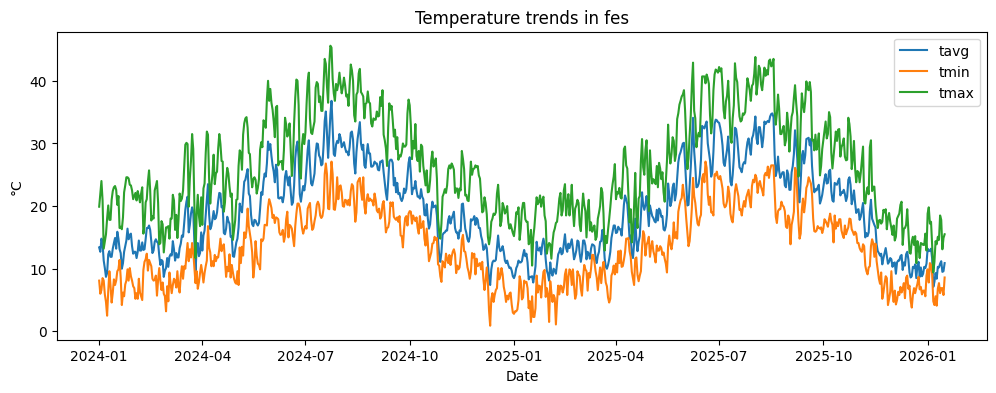

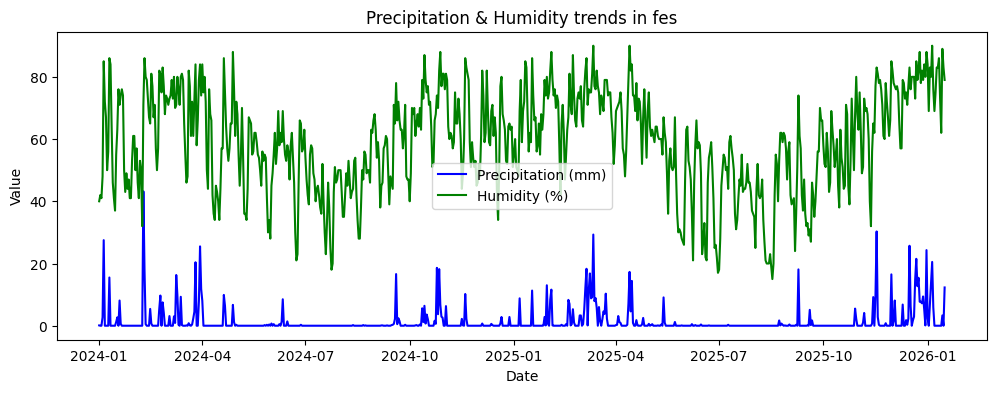

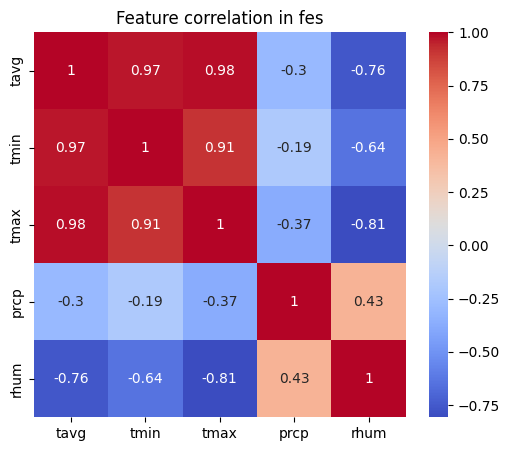

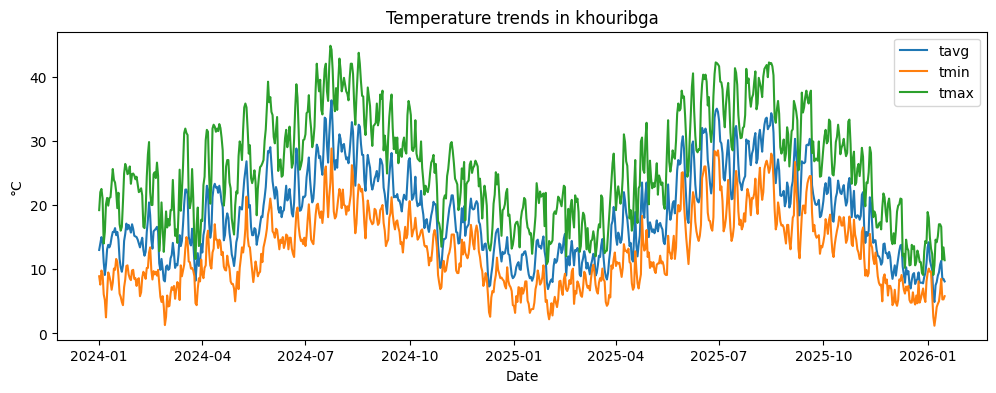

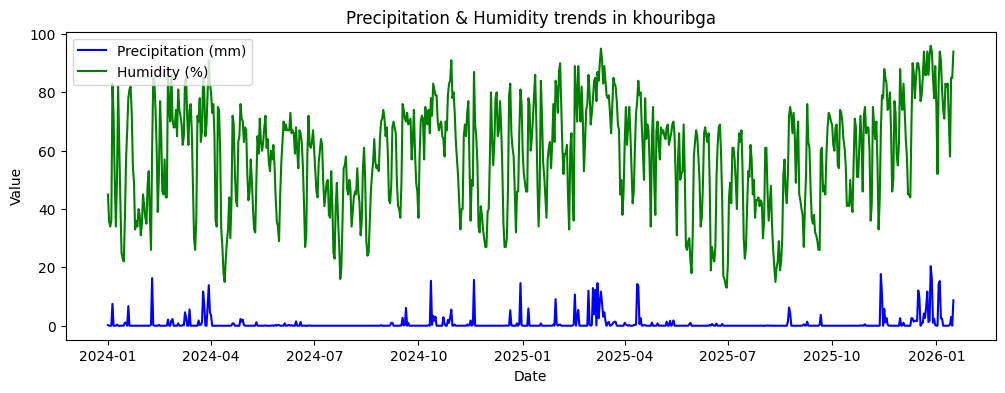

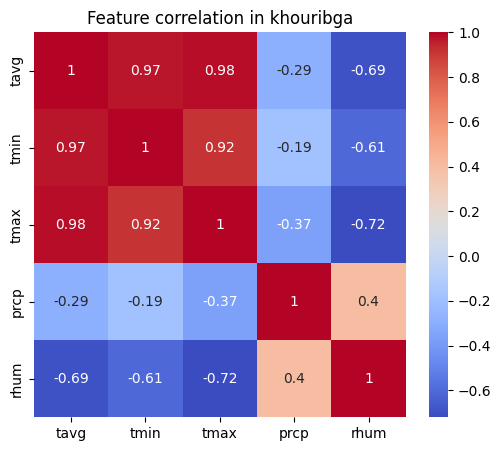

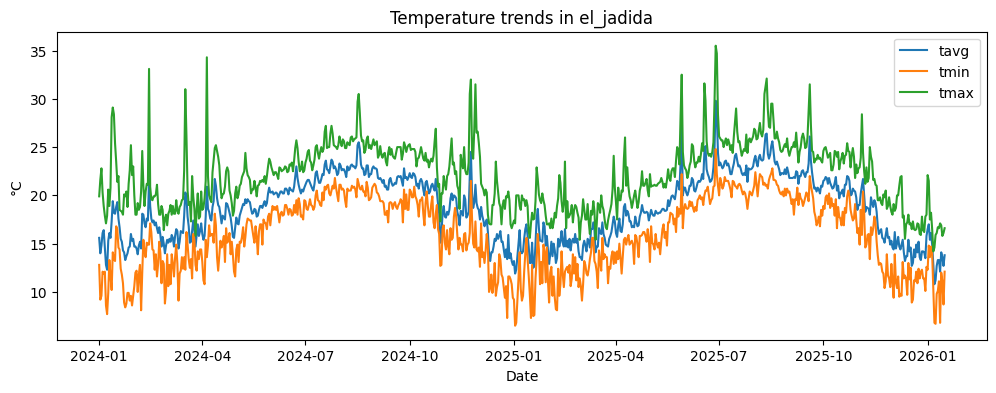

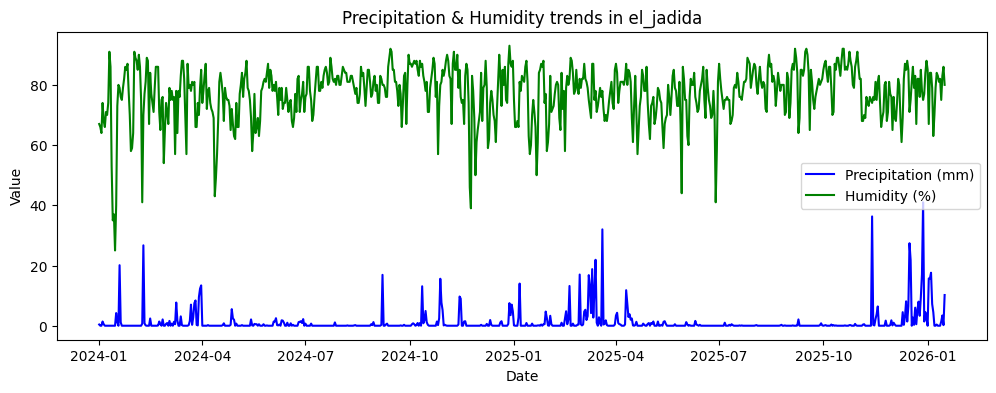

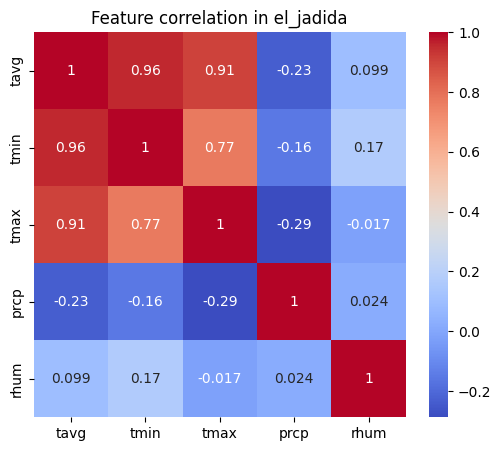

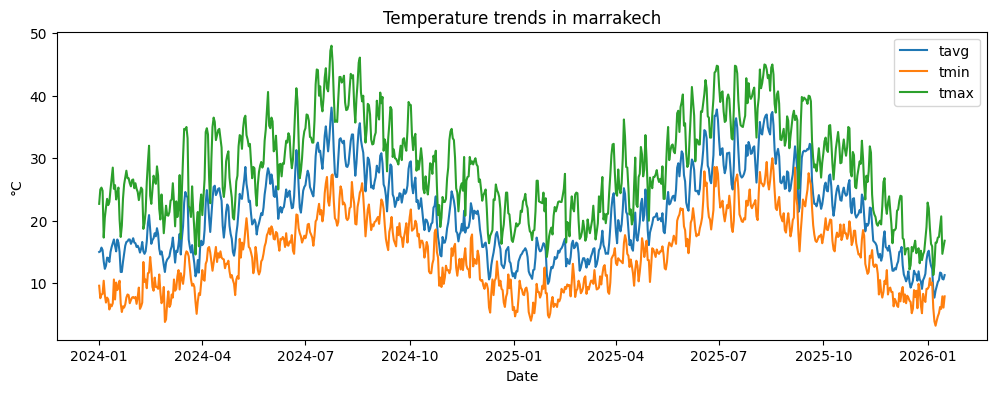

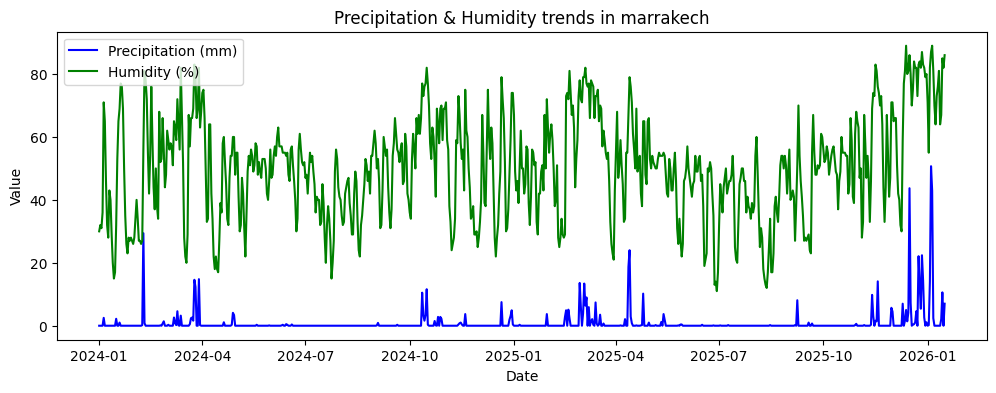

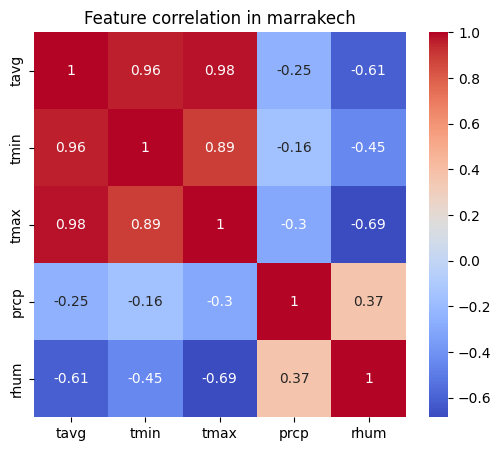

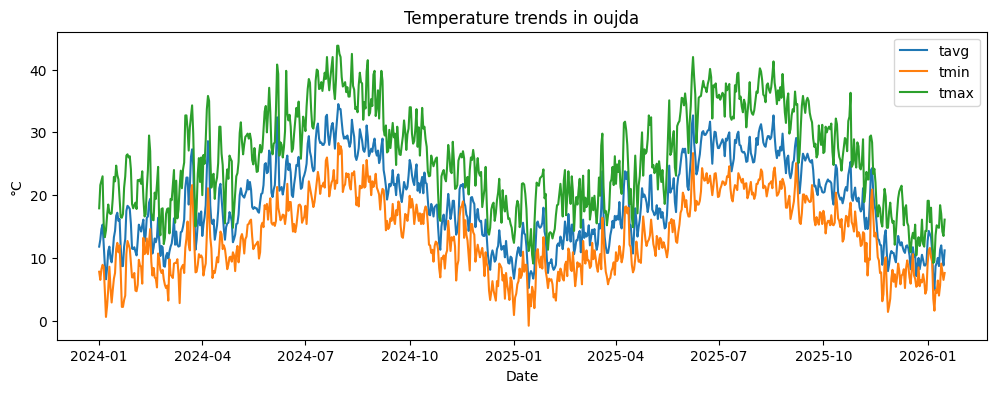

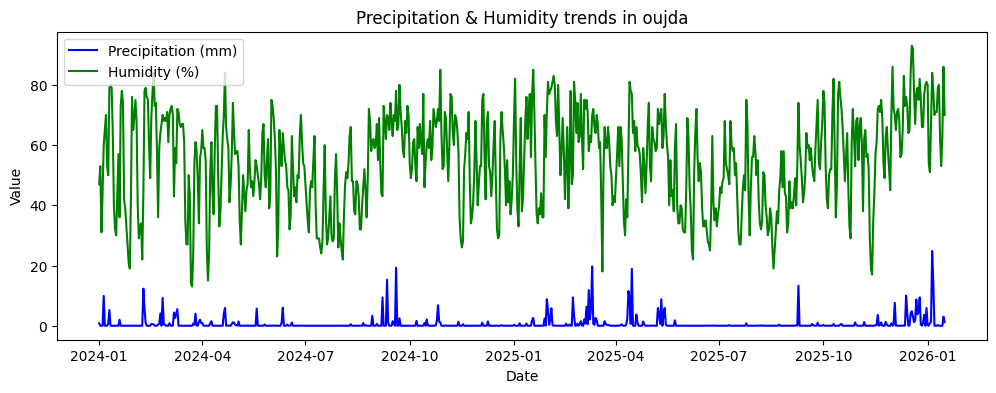

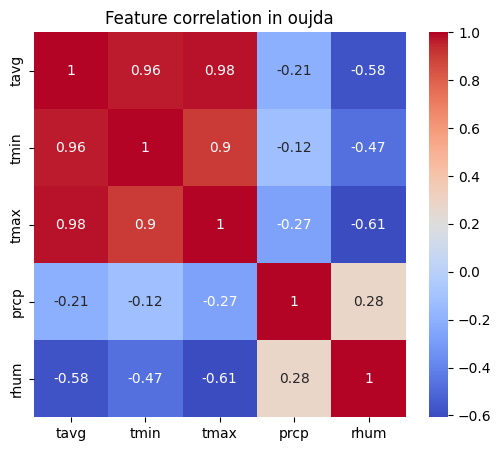

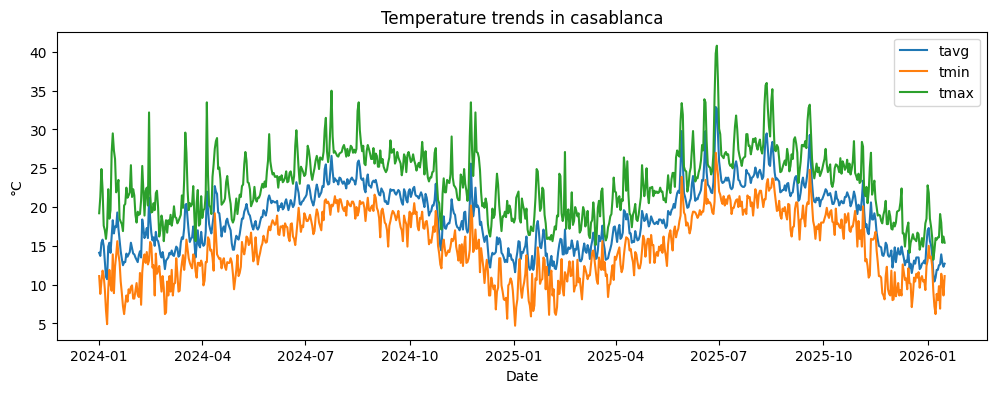

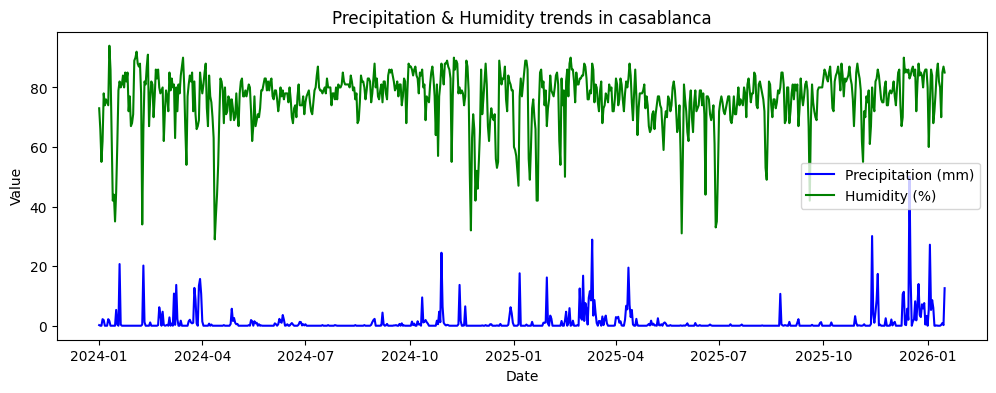

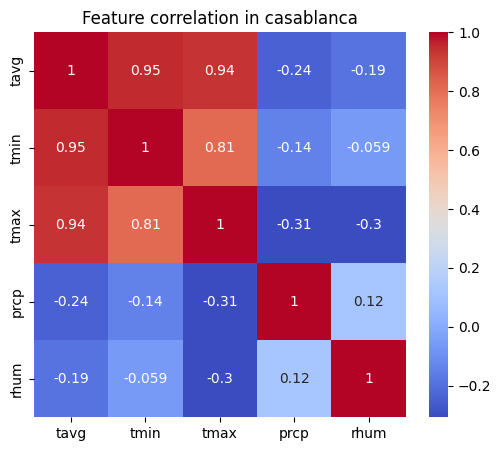

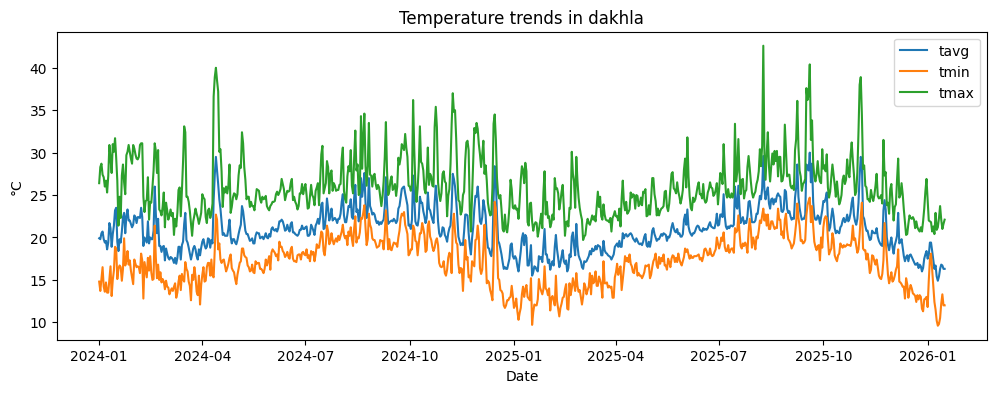

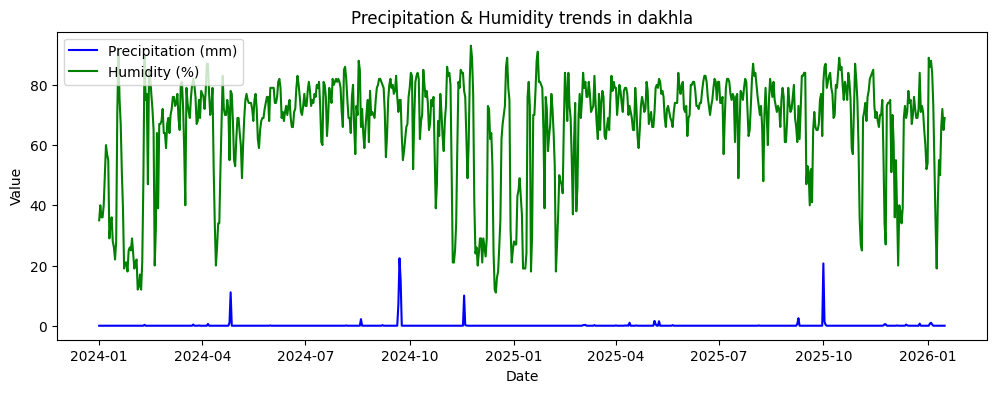

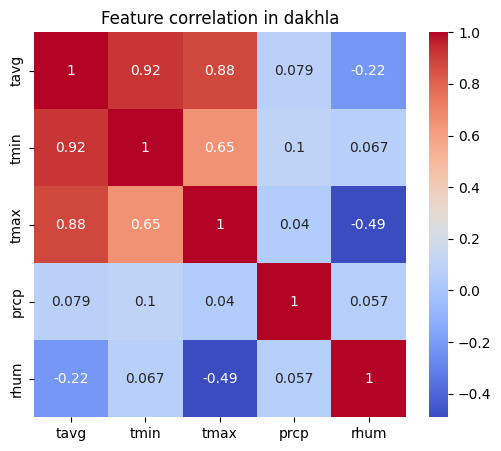

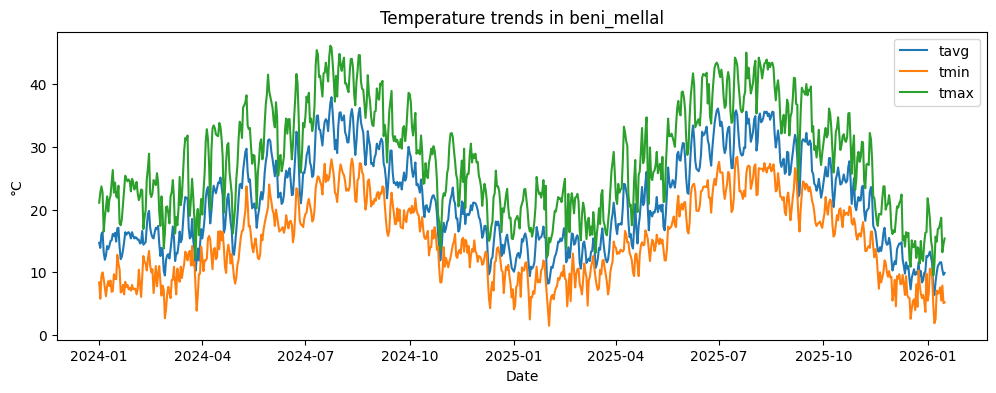

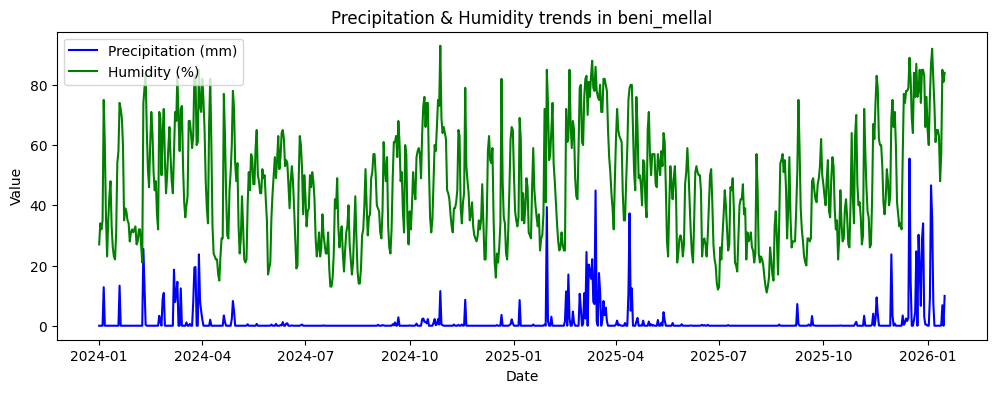

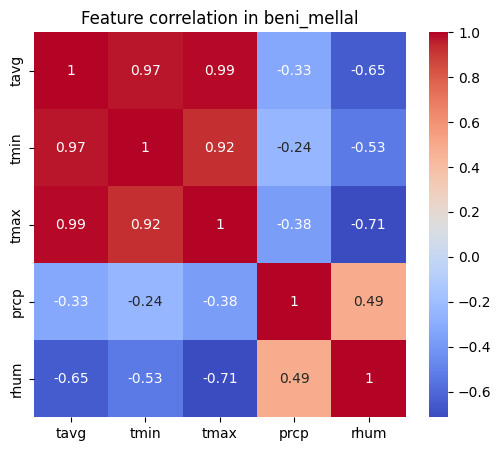

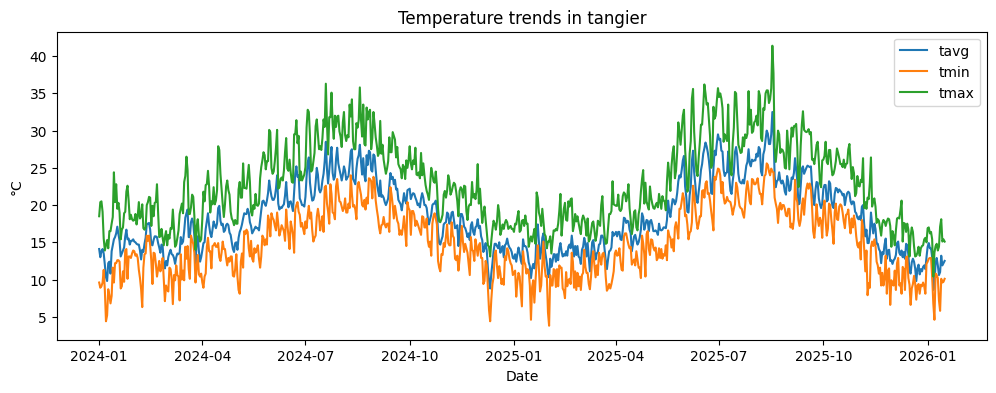

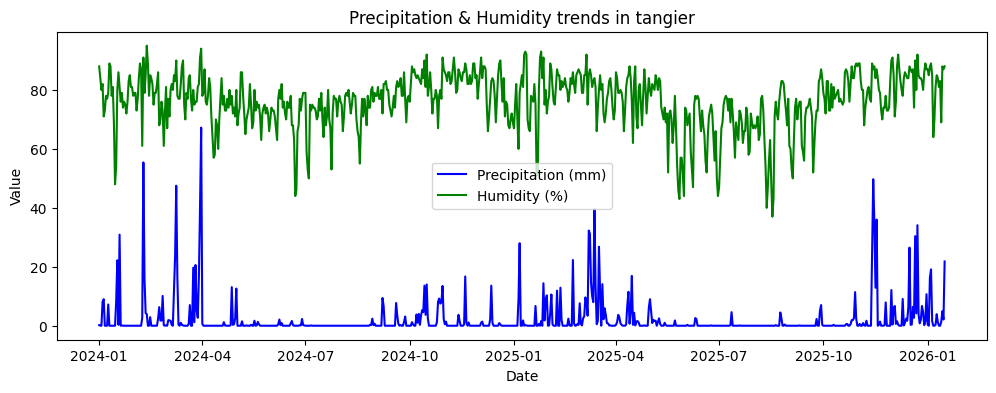

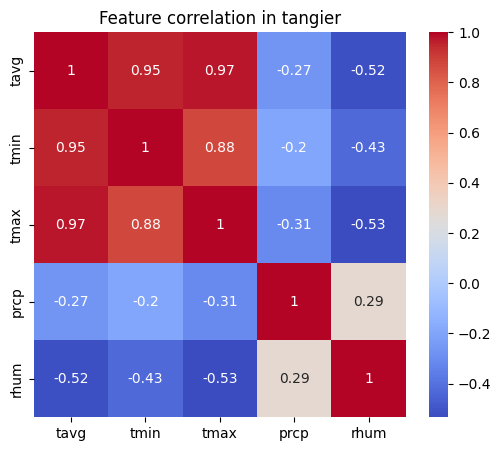

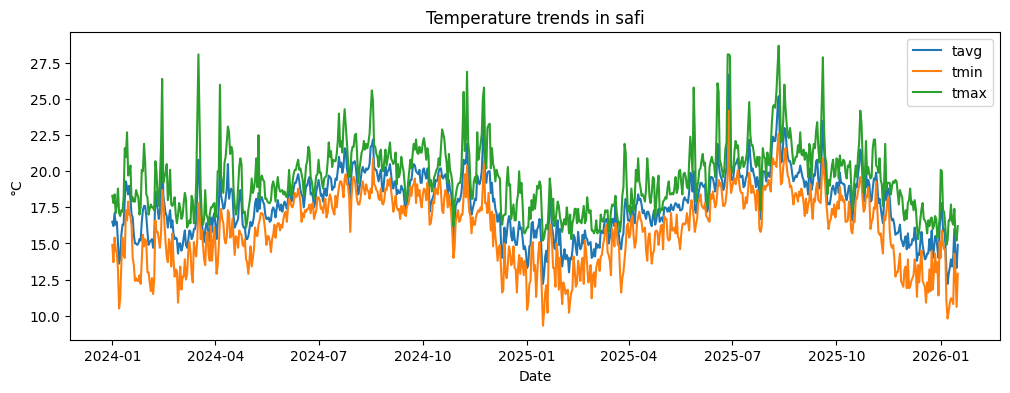

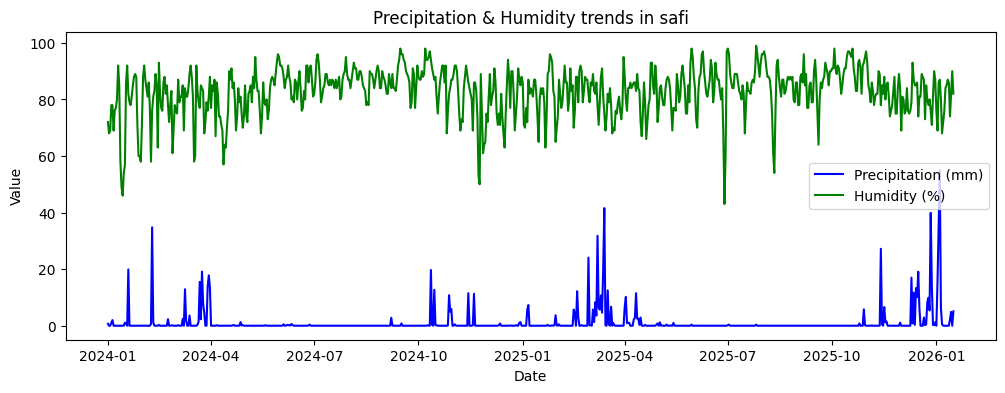

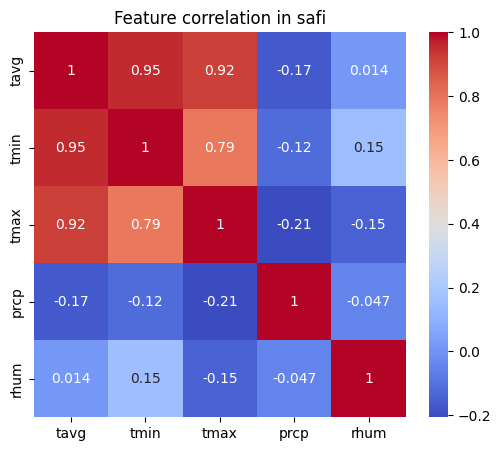

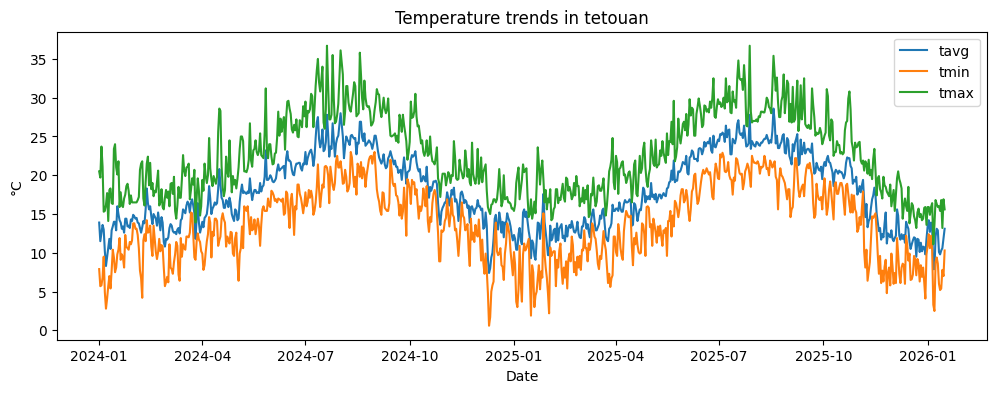

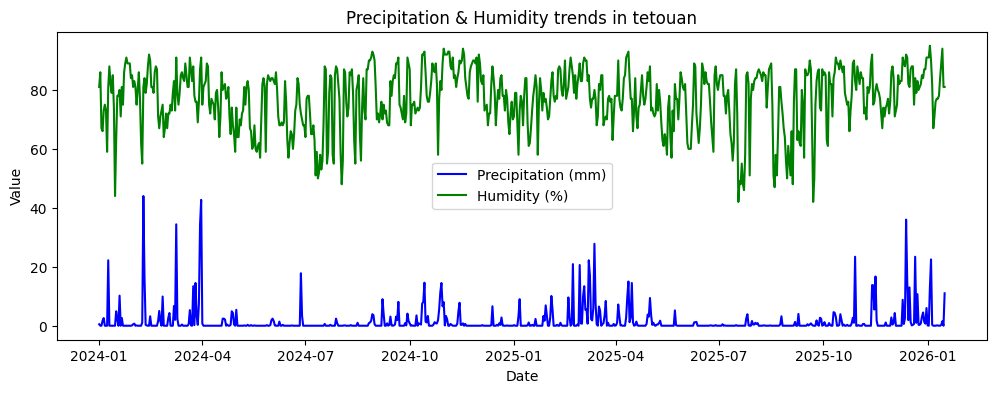

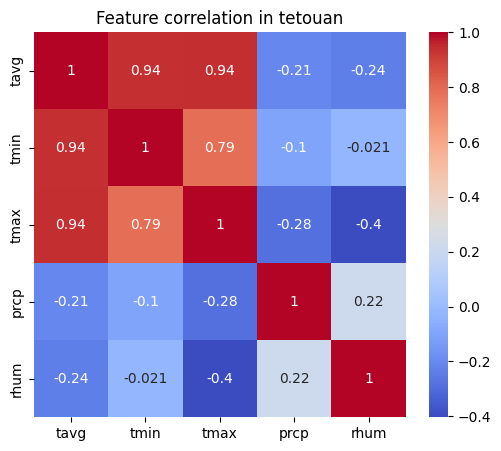

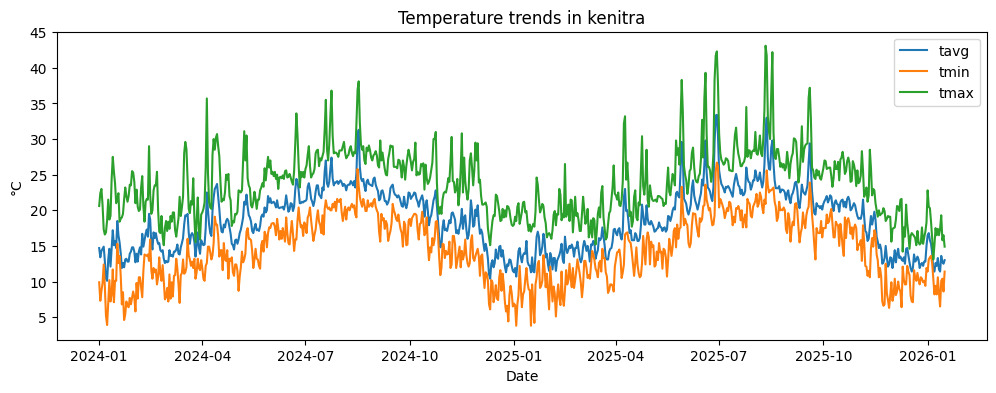

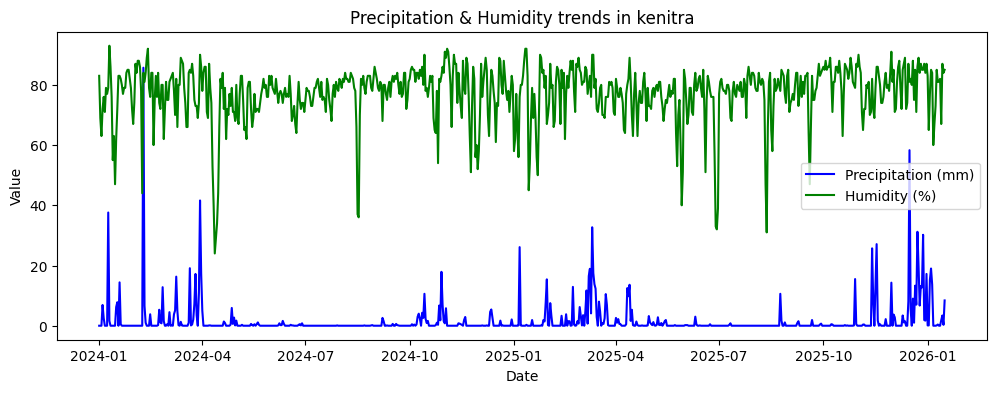

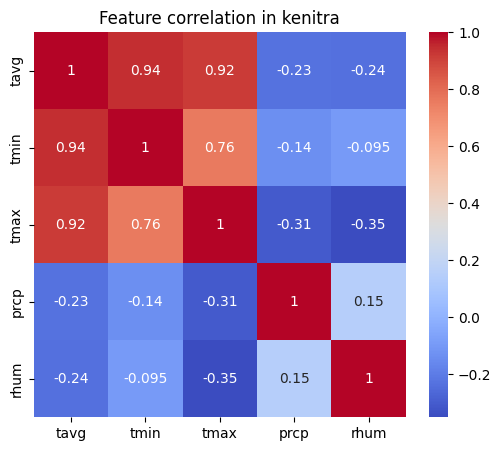

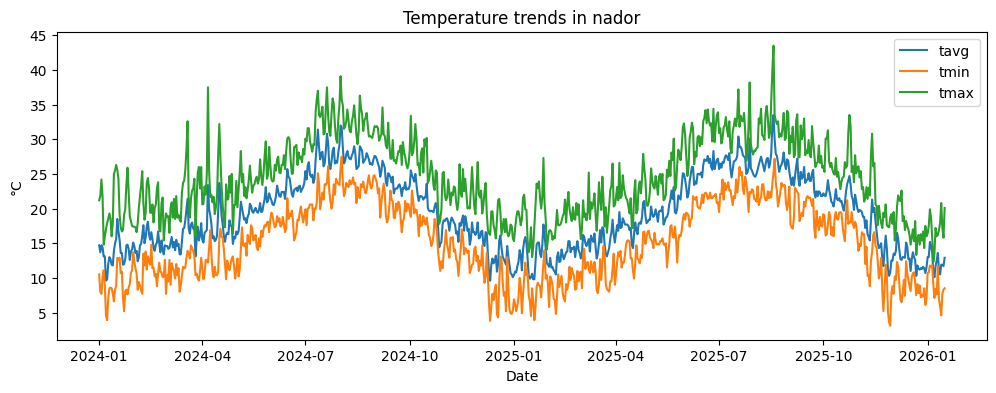

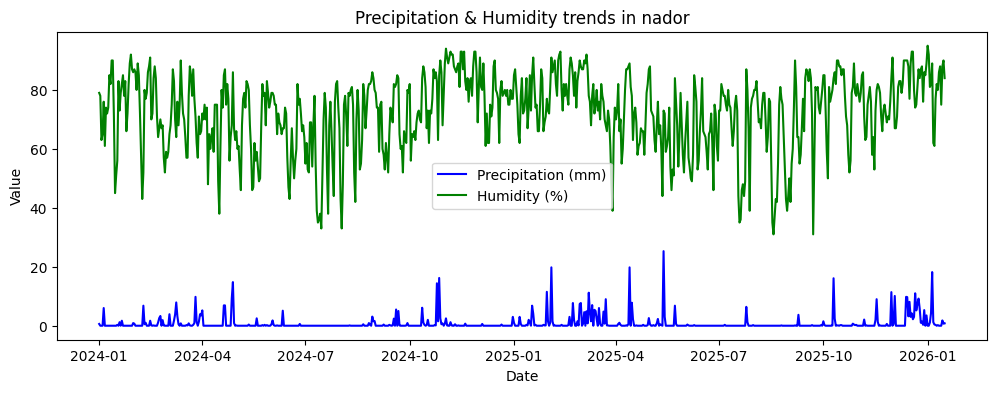

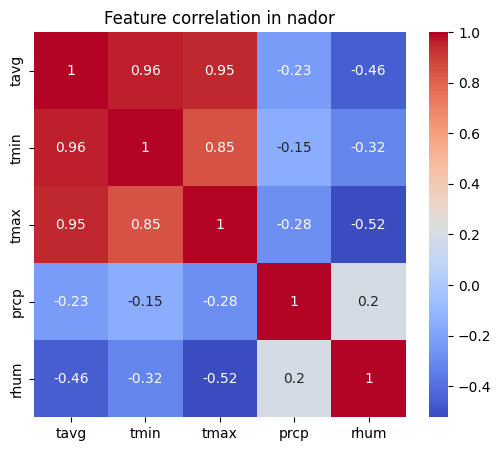

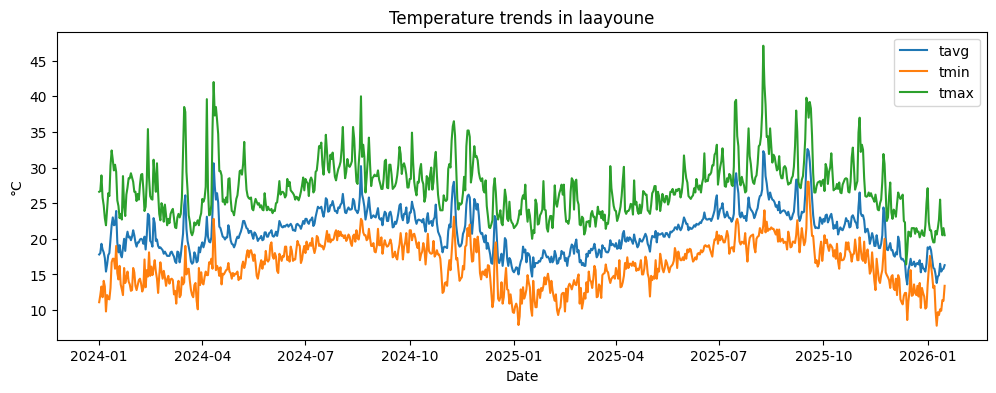

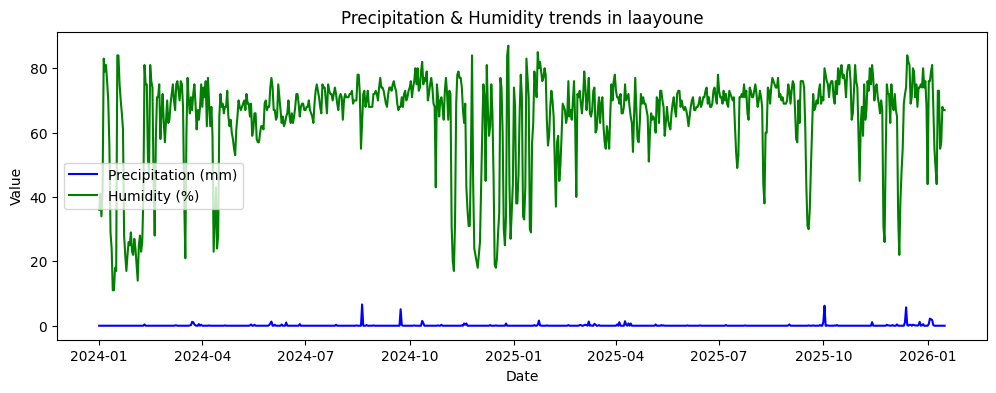

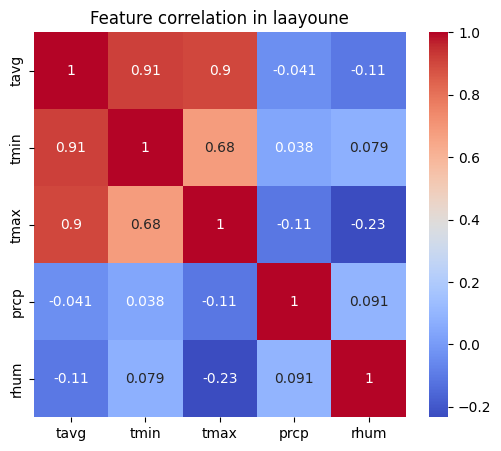

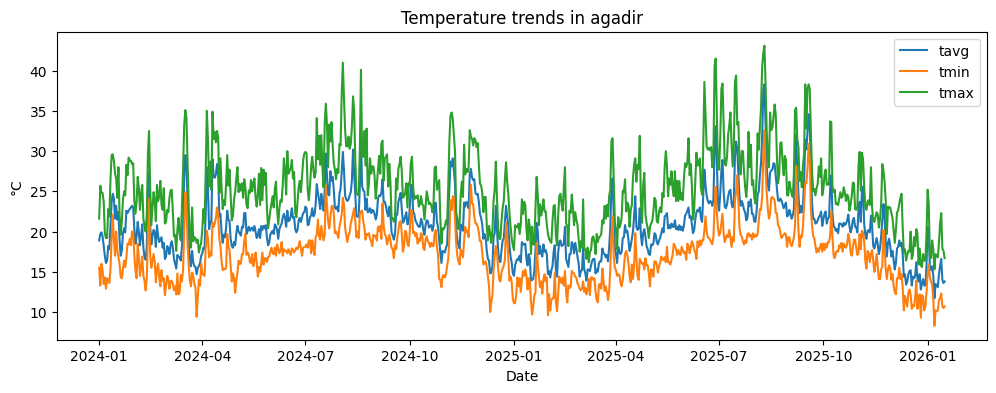

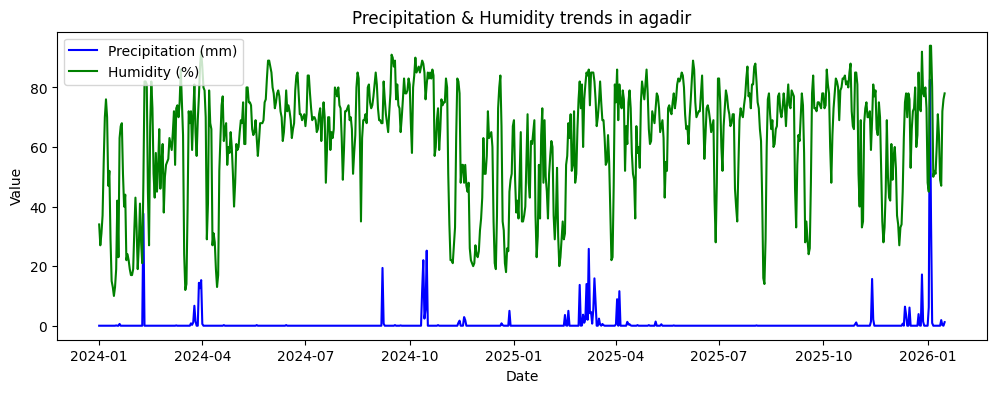

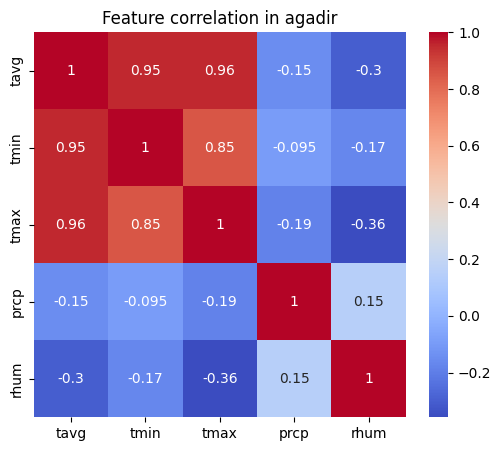

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

features_temp = ["tavg", "tmin", "tmax"]
features_env = ["prcp", "rhum"]

for city_file in os.listdir("datasets"):
    if not city_file.endswith(".csv"):
        continue
    city = city_file.replace(".csv", "")

    df = pd.read_csv(f"datasets/{city_file}")
    df['date'] = pd.to_datetime(df['date'])

    # --- Temperature trends ---
    plt.figure(figsize=(12,4))
    for f in features_temp:
        plt.plot(df['date'], df[f], label=f)
    plt.title(f"Temperature trends in {city}")
    plt.xlabel("Date")
    plt.ylabel("°C")
    plt.legend()
    plt.show()

    # --- Precipitation & Humidity trends ---
    plt.figure(figsize=(12,4))
    plt.plot(df['date'], df['prcp'], label="Precipitation (mm)", color='b')
    plt.plot(df['date'], df['rhum'], label="Humidity (%)", color='g')
    plt.title(f"Precipitation & Humidity trends in {city}")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

    # --- Correlation heatmap ---
    plt.figure(figsize=(6,5))
    sns.heatmap(df[["tavg","tmin","tmax","prcp","rhum"]].corr(), annot=True, cmap="coolwarm")
    plt.title(f"Feature correlation in {city}")
    plt.show()


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Zip the datasets folder
shutil.make_archive("datasets", 'zip', "datasets")
shutil.make_archive("models", 'zip', "models")
shutil.make_archive("scalers", 'zip', "scalers")


'/content/scalers.zip'